In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import IsolationForest
from sklearn.mixture import BayesianGaussianMixture
import nltk


In [2]:
# Load the dataset from CSV file
data = pd.read_csv('Dataset.csv')

# Preprocess the data
news = data['News'].astype(str)

In [3]:

# Download 'punkt' resource
nltk.download('punkt')

# Download 'stopwords' resource
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
stopwords = ['your', 'stop', 'words', 'here']  # Add your list of stopwords
news = news.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))



In [5]:
vectorizer = TfidfVectorizer()
news_tfidf = vectorizer.fit_transform(news)


In [6]:
svd = TruncatedSVD(n_components=2)
news_svd = svd.fit_transform(news_tfidf)

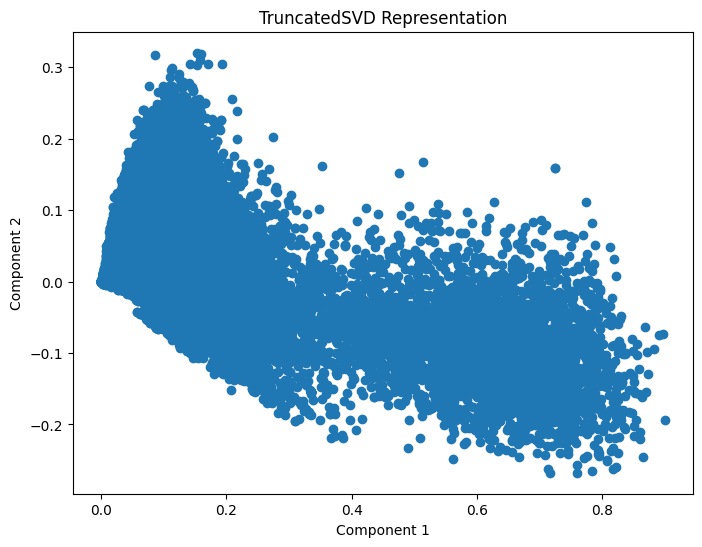

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(news_svd[:, 0], news_svd[:, 1])
plt.title('TruncatedSVD Representation')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [8]:
from sklearn.mixture import BayesianGaussianMixture
n_components = 2  # Number of components (real news and fake news)
gmm = BayesianGaussianMixture(n_components=n_components, covariance_type='full', max_iter=100, verbose=1)
gmm.fit(news_svd)


Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


BayesianGaussianMixture(n_components=2, verbose=1)

In [9]:
outliers_fraction = 0.1  # Fraction of outliers expected in the data
anomaly_detector = IsolationForest(contamination=outliers_fraction)
anomaly_detector.fit(news_svd)

IsolationForest(contamination=0.1)

In [11]:
labels = gmm.predict(news_svd)


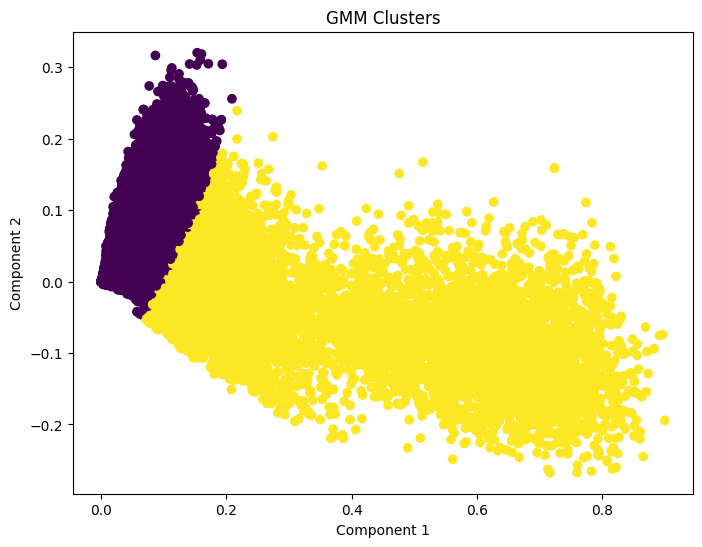

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(news_svd[:, 0], news_svd[:, 1], c=labels, cmap='viridis')
plt.title('GMM Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


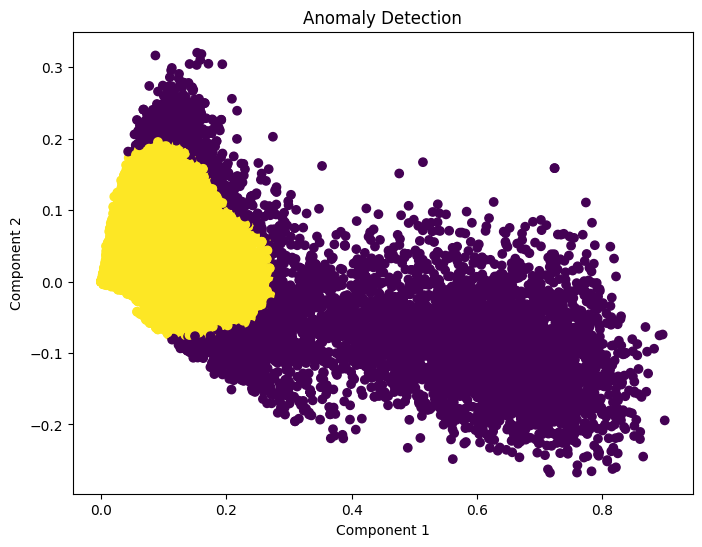

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(news_svd[:, 0], news_svd[:, 1], c=anomaly_detector.predict(news_svd), cmap='viridis')
plt.title('Anomaly Detection')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [15]:
import pickle

# Save the GMM model
with open('gmm_model.pkl', 'wb') as file:
    pickle.dump(gmm, file)

# Save the TruncatedSVD model
with open('svd_model.pkl', 'wb') as file:
    pickle.dump(svd, file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
